In [5]:
import math
import torch
import gpytorch
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from GPyEm import GPE_ensemble as GPE

import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


seed = 7
#set_seed(seed)

In [6]:
mesh = 54

In [7]:
x_labels=pd.read_csv(r'/Users/pmzcwl/Library/CloudStorage/OneDrive-TheUniversityofNottingham/shared_simulations/mechanics/scenario_12/xlabels.txt',delim_whitespace=True,header=None)

In [8]:
x_labels=pd.read_csv(r'/Users/pmzcwl/Library/CloudStorage/OneDrive-TheUniversityofNottingham/shared_simulations/mechanics/scenario_12/xlabels.txt',delim_whitespace=True,header=None)

X_all = pd.read_csv(r'/Users/pmzcwl/Library/CloudStorage/OneDrive-TheUniversityofNottingham/shared_simulations/mechanics/scenario_'+str(mesh)+'/X.txt',index_col=None,delim_whitespace=True,header=None)
# X_all.columns=x_labels.values.squeeze().tolist()
print(X_all)

           0         1         2         3        4        5         6  \
0    2.77049   5.32910   9.17043   7.23675  5.21731  32.2885  11.74730   
1    3.61746  12.72040  12.80220   8.35094  2.05551  39.2948  10.69220   
2    2.38790   7.65312  14.38840  10.16880  4.06018  28.3848  17.31130   
3    3.76219  21.59860  11.81960   3.56951  2.52663  18.8133  10.60980   
4    0.83687  10.96490   2.71685   3.73192  3.98974  30.5635   5.18740   
..       ...       ...       ...       ...      ...      ...       ...   
195  1.57167  20.55250   4.34630   4.02029  4.08107  32.4084  16.89020   
196  3.87212  31.39530   3.95767   9.41722  3.54334  16.8671  10.51070   
197  1.90693  19.14840   7.64500   4.70468  2.66861  22.9449  19.89110   
198  2.88270  17.37540  14.74540  10.00510  4.58641  27.4414   8.65209   
199  1.07599   4.21971   8.84592   3.88759  2.23291  12.5012  19.51450   

            7         8        9  
0    11.25900  0.013097  1.43362  
1    11.99220  0.004829  1.53001  
2    1

In [9]:
mask = pd.read_csv(r'/Users/pmzcwl/Library/CloudStorage/OneDrive-TheUniversityofNottingham/shared_simulations/mechanics/scenario_'+str(mesh)+'/output_mask.txt',index_col=None,delim_whitespace=True,header=None)

In [10]:
np.sum(mask)

0    180
dtype: int64

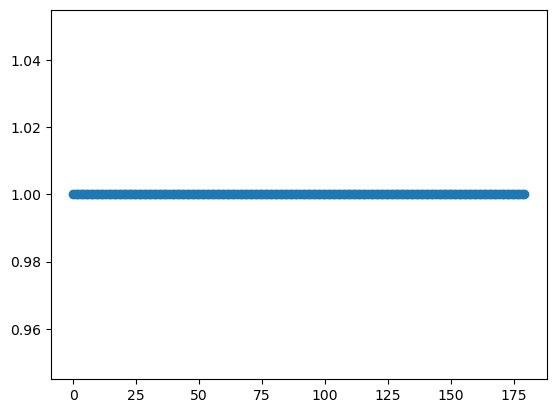

In [11]:
plt.plot(mask,'o')

In [12]:
y_labels=pd.read_csv(r'/Users/pmzcwl/Library/CloudStorage/OneDrive-TheUniversityofNottingham/shared_simulations/mechanics/scenario_12/ylabels.txt',delim_whitespace=True,header=None)


y_all = pd.read_csv(r'/Users/pmzcwl/Library/CloudStorage/OneDrive-TheUniversityofNottingham/shared_simulations/mechanics/scenario_'+str(mesh)+'/Y.txt',index_col=None,delim_whitespace=True,header=None)
y_all.columns=y_labels.values.squeeze().tolist()
print(y_all)

     $V^{\mathrm{max}}_{\mathrm{LV}}$  $V^{\mathrm{max}}_{\mathrm{RV}}$  \
0                             255.522                           193.115   
1                             249.917                           194.597   
2                             249.671                           189.602   
3                             250.508                           192.337   
4                             282.692                           195.475   
..                                ...                               ...   
175                           258.376                           193.021   
176                           250.162                           192.238   
177                           258.070                           195.385   
178                           254.143                           195.160   
179                           246.347                           192.433   

     $V^{\mathrm{max}}_{\mathrm{LA}}$  $V^{\mathrm{max}}_{\mathrm{RA}}$  \
0                       

In [13]:
input_masked = X_all.copy()

In [14]:
input_masked = X_all.copy().iloc[0:mask.shape[0]]
input_masked=input_masked.iloc[np.array(mask==1),]
y_all=y_all.iloc[np.array(mask==1),]
input_masked.index = y_all.index

In [15]:
y_train = torch.tensor(y_all.values)
x_train = torch.tensor(input_masked.values)

In [16]:
emulator = GPE.ensemble(x_train,y_train,mean_func="linear",training_iter=500)

0
1
2
3
4
5
6
7
8
9


In [17]:
nDim = input_masked.shape[1]
boundsMaxMin = []
for i in range(nDim):
    boundsMaxMin.append([np.min(input_masked.iloc[:,i]),np.max(input_masked.iloc[:,i])])
    print(boundsMaxMin[i])

[0.503218, 4.98092]
[2.00623, 31.9479]
[1.06893, 15.9664]
[0.7678, 11.9495]
[1.50603, 5.99704]
[10.1435, 39.8584]
[5.04584, 19.9778]
[3.76184, 14.9855]
[0.000669586, 0.0499096]
[1.00128, 1.99595]


In [18]:
x_labels=[1,2,3,4,5,6,7,8,9,10]

In [26]:
##### from SALib.sample import saltelli
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
import numpy as np

# Define the model inputs
problem = {
    'num_vars': nDim,
    'names': x_labels,
    'bounds': boundsMaxMin
    #'bounds': [[-1, 1],
     #          [-1, 1],
      #         [-1, 1],
       #        [-1, 1],
        #       [-1, 1],
         #      [-1, 1],
          #     [-1, 1],
           #    [-1, 1],
            #   [-1,1]]
}

# Generate samples
param_values = saltelli.sample(problem, 1024)

data1 = torch.tensor(param_values)
#data1.columns = X_train.columns

Ymean=emulator.predict_sample(data1,n=1)

/var/folders/_j/ptyc01811q5b1dg30hshtfzh0000gr/T/ipykernel_31843/3331121088.py:24: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 1024)


In [27]:
Si = [[],[],[]]
nMod = y_all.shape[1]
Si = [[]]*nMod

In [28]:
Si

[[], [], [], [], [], [], [], [], [], []]

In [29]:
Ymean.shape

torch.Size([22528, 1, 10])

In [52]:
Ymean[:,:,5]

tensor([[0.0291],
        [0.0067],
        [0.0236],
        ...,
        [0.0057],
        [0.0071],
        [0.0110]])

In [100]:
Si = [[],[]]

In [101]:
Si[1].append(0)

In [102]:
Si

[[], [0]]

In [104]:
nMod = y_all.shape[1]
Si = [ [] for _ in range(nMod) ]
nDim = input_masked.shape[1]
print(len(Si[0]))
for j in range(Ymean.shape[1]):
    print(j)
    for i in range(nMod):
        Si[i].append(sobol.analyze(problem, Ymean[:,j,i].detach().numpy(), print_to_console=False,calc_second_order=True))


0
0


In [105]:
Si_first=np.zeros((nDim,nMod))
Si_total=np.zeros((nDim,nMod))

for j in range(Ymean.shape[1]):
    for i in range(nMod):
        total_Si, first_Si, second_Si = Si[i][j].to_df()
        Si_first[:,i] +=  first_Si.iloc[:,0]/Ymean.shape[1]
        Si_total[:,i] +=  total_Si.iloc[:,0]/Ymean.shape[1]


In [106]:
Si[4][j].to_df()[0]

,ST,ST_conf
1,0.629311,0.066163
2,0.135973,0.018910
3,0.001918,0.000288
4,0.214533,0.024502
5,0.000857,0.000143
6,0.000558,0.000080
7,0.000521,0.000085
8,0.000226,0.000039
9,0.098913,0.018046
10,0.000422,0.000062


In [107]:
# x_labels.values.squeeze().tolist()

In [108]:
y_all.columns.tolist()

['$V^{\\mathrm{max}}_{\\mathrm{LV}}$',
 '$V^{\\mathrm{max}}_{\\mathrm{RV}}$',
 '$V^{\\mathrm{max}}_{\\mathrm{LA}}$',
 '$V^{\\mathrm{max}}_{\\mathrm{RA}}$',
 '$\\overline{E_{ff,\\mathrm{LV}}}$',
 '$\\overline{E_{ff,\\mathrm{RV}}}$',
 '$\\overline{E_{ff,\\mathrm{LA}}}$',
 '$\\overline{E_{ff,\\mathrm{RA}}}$',
 '$\\overline{E_{ff,\\mathrm{V}}}$',
 '$\\overline{E_{ff,\\mathrm{A}}}$']

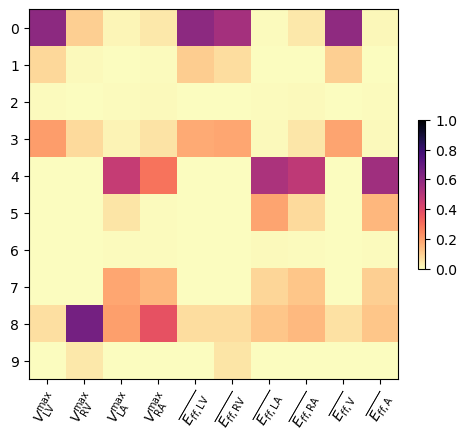

In [109]:
inputs = X_all.columns.tolist()
outputs = y_all.columns.tolist()
fig, ax = plt.subplots()
im = ax.imshow(Si_first[0:28],cmap='magma_r',vmin=0,vmax=1)

ax.set_xticks(np.arange(len(outputs)),labels=outputs)
ax.set_yticks(np.arange(len(inputs)), labels=inputs)
plt.setp(ax.get_xticklabels(), rotation=60, ha="right",
         rotation_mode="anchor");

plt.colorbar(im,fraction=0.015, pad=0.04)

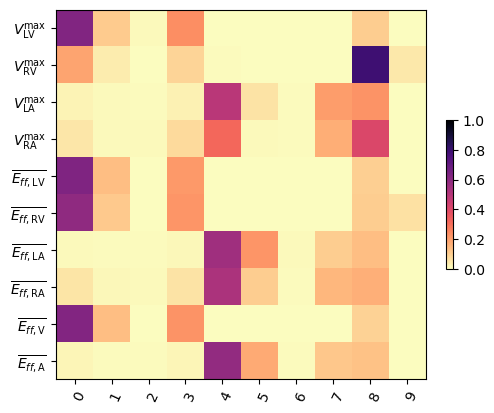

In [111]:
inputs = X_all.columns.tolist()
outputs = y_all.columns.tolist()
fig, ax = plt.subplots()
im = ax.imshow(Si_total.T[0:28],cmap='magma_r',vmin=0,vmax=1)

ax.set_yticks(np.arange(len(outputs)),labels=outputs)
ax.set_xticks(np.arange(len(inputs)), labels=inputs)
plt.setp(ax.get_xticklabels(), rotation=65, ha="right",
         rotation_mode="anchor");

plt.colorbar(im,fraction=0.015, pad=0.04)

In [26]:
np.savetxt("Si_total_mech_"+str(mesh)+".csv", Si_total, delimiter=",")
np.savetxt("Si_first_mech_"+str(mesh)+".csv", Si_first, delimiter=",")

In [112]:
meshes = [54, 41, 42, 43, 44]

for m in meshes:

    mesh=m

    X_all = pd.read_csv(r'/Users/pmzcwl/Library/CloudStorage/OneDrive-TheUniversityofNottingham/shared_simulations/mechanics/scenario_'+str(mesh)+'/X.txt',index_col=None,delim_whitespace=True,header=None)
    # X_all.columns=x_labels.values.squeeze().tolist()
    print(X_all)
    
    mask = pd.read_csv(r'/Users/pmzcwl/Library/CloudStorage/OneDrive-TheUniversityofNottingham/shared_simulations/mechanics/scenario_'+str(mesh)+'/output_mask.txt',index_col=None,delim_whitespace=True,header=None)
    
    y_labels=pd.read_csv(r'/Users/pmzcwl/Library/CloudStorage/OneDrive-TheUniversityofNottingham/shared_simulations/mechanics/scenario_12/ylabels.txt',delim_whitespace=True,header=None)
    
    
    y_all = pd.read_csv(r'/Users/pmzcwl/Library/CloudStorage/OneDrive-TheUniversityofNottingham/shared_simulations/mechanics/scenario_'+str(mesh)+'/Y.txt',index_col=None,delim_whitespace=True,header=None)
    y_all.columns=y_labels.values.squeeze().tolist()
    print(y_all)
    
    input_masked = X_all.copy().iloc[0:mask.shape[0]]
    input_masked=input_masked.iloc[np.array(mask==1),]
    y_all=y_all.iloc[np.array(mask==1),]
    input_masked.index = y_all.index
    
    y_train = torch.tensor(y_all.values)
    x_train = torch.tensor(input_masked.values)
    
    emulator = GPE.ensemble(x_train,y_train,mean_func="linear",training_iter=500)
    
    nDim = input_masked.shape[1]
    boundsMaxMin = []
    for i in range(nDim):
        boundsMaxMin.append([np.min(input_masked.iloc[:,i]),np.max(input_masked.iloc[:,i])])
        print(boundsMaxMin[i])
    
    x_labels=[1,2,3,4,5,6,7,8,9,10]
    
    ##### from SALib.sample import saltelli
    from SALib.sample import saltelli
    from SALib.analyze import sobol
    from SALib.test_functions import Ishigami
    import numpy as np
    
    # Define the model inputs
    problem = {
        'num_vars': nDim,
        'names': x_labels,
        'bounds': boundsMaxMin
        #'bounds': [[-1, 1],
         #          [-1, 1],
          #         [-1, 1],
           #        [-1, 1],
            #       [-1, 1],
             #      [-1, 1],
              #     [-1, 1],
               #    [-1, 1],
                #   [-1,1]]
    }
    
    # Generate samples
    param_values = saltelli.sample(problem, 1024)
    
    data1 = torch.tensor(param_values)
    #data1.columns = X_train.columns
    
    Ymean=emulator.predict_sample(data1,n=1000)
    
    nMod = y_all.shape[1]
    Si = [ [] for _ in range(nMod) ]
    nDim = input_masked.shape[1]
    for j in range(Ymean.shape[1]):
        for i in range(nMod):
            Si[i].append(sobol.analyze(problem, Ymean[:,j,i].detach().numpy(), print_to_console=False,calc_second_order=True))
    
    
    Si_first=np.zeros((nDim,nMod))
    Si_total=np.zeros((nDim,nMod))
    
    for j in range(Ymean.shape[1]):
        for i in range(nMod):
            total_Si, first_Si, second_Si = Si[i][j].to_df()
            Si_first[:,i] +=  first_Si.iloc[:,0]/Ymean.shape[1]
            Si_total[:,i] +=  total_Si.iloc[:,0]/Ymean.shape[1]
    
    
    
    np.savetxt("Si_total_mech_"+str(mesh)+".csv", Si_total, delimiter=",")
    np.savetxt("Si_first_mech_"+str(mesh)+".csv", Si_first, delimiter=",")

           0         1         2         3        4        5         6  \
0    2.77049   5.32910   9.17043   7.23675  5.21731  32.2885  11.74730   
1    3.61746  12.72040  12.80220   8.35094  2.05551  39.2948  10.69220   
2    2.38790   7.65312  14.38840  10.16880  4.06018  28.3848  17.31130   
3    3.76219  21.59860  11.81960   3.56951  2.52663  18.8133  10.60980   
4    0.83687  10.96490   2.71685   3.73192  3.98974  30.5635   5.18740   
..       ...       ...       ...       ...      ...      ...       ...   
195  1.57167  20.55250   4.34630   4.02029  4.08107  32.4084  16.89020   
196  3.87212  31.39530   3.95767   9.41722  3.54334  16.8671  10.51070   
197  1.90693  19.14840   7.64500   4.70468  2.66861  22.9449  19.89110   
198  2.88270  17.37540  14.74540  10.00510  4.58641  27.4414   8.65209   
199  1.07599   4.21971   8.84592   3.88759  2.23291  12.5012  19.51450   

            7         8        9  
0    11.25900  0.013097  1.43362  
1    11.99220  0.004829  1.53001  
2    1

/var/folders/_j/ptyc01811q5b1dg30hshtfzh0000gr/T/ipykernel_31843/1279011886.py:61: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 1024)


           0         1         2         3        4        5         6  \
0    2.77049   5.32910   9.17043   7.23675  5.21731  32.2885  11.74730   
1    3.61746  12.72040  12.80220   8.35094  2.05551  39.2948  10.69220   
2    2.38790   7.65312  14.38840  10.16880  4.06018  28.3848  17.31130   
3    3.76219  21.59860  11.81960   3.56951  2.52663  18.8133  10.60980   
4    0.83687  10.96490   2.71685   3.73192  3.98974  30.5635   5.18740   
..       ...       ...       ...       ...      ...      ...       ...   
195  1.57167  20.55250   4.34630   4.02029  4.08107  32.4084  16.89020   
196  3.87212  31.39530   3.95767   9.41722  3.54334  16.8671  10.51070   
197  1.90693  19.14840   7.64500   4.70468  2.66861  22.9449  19.89110   
198  2.88270  17.37540  14.74540  10.00510  4.58641  27.4414   8.65209   
199  1.07599   4.21971   8.84592   3.88759  2.23291  12.5012  19.51450   

            7         8        9  
0    11.25900  0.013097  1.43362  
1    11.99220  0.004829  1.53001  
2    1

/var/folders/_j/ptyc01811q5b1dg30hshtfzh0000gr/T/ipykernel_31843/1279011886.py:61: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 1024)


           0         1         2         3        4        5         6  \
0    2.77049   5.32910   9.17043   7.23675  5.21731  32.2885  11.74730   
1    3.61746  12.72040  12.80220   8.35094  2.05551  39.2948  10.69220   
2    2.38790   7.65312  14.38840  10.16880  4.06018  28.3848  17.31130   
3    3.76219  21.59860  11.81960   3.56951  2.52663  18.8133  10.60980   
4    0.83687  10.96490   2.71685   3.73192  3.98974  30.5635   5.18740   
..       ...       ...       ...       ...      ...      ...       ...   
195  1.57167  20.55250   4.34630   4.02029  4.08107  32.4084  16.89020   
196  3.87212  31.39530   3.95767   9.41722  3.54334  16.8671  10.51070   
197  1.90693  19.14840   7.64500   4.70468  2.66861  22.9449  19.89110   
198  2.88270  17.37540  14.74540  10.00510  4.58641  27.4414   8.65209   
199  1.07599   4.21971   8.84592   3.88759  2.23291  12.5012  19.51450   

            7         8        9  
0    11.25900  0.013097  1.43362  
1    11.99220  0.004829  1.53001  
2    1

/var/folders/_j/ptyc01811q5b1dg30hshtfzh0000gr/T/ipykernel_31843/1279011886.py:61: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 1024)


           0         1         2         3        4        5         6  \
0    2.77049   5.32910   9.17043   7.23675  5.21731  32.2885  11.74730   
1    3.61746  12.72040  12.80220   8.35094  2.05551  39.2948  10.69220   
2    2.38790   7.65312  14.38840  10.16880  4.06018  28.3848  17.31130   
3    3.76219  21.59860  11.81960   3.56951  2.52663  18.8133  10.60980   
4    0.83687  10.96490   2.71685   3.73192  3.98974  30.5635   5.18740   
..       ...       ...       ...       ...      ...      ...       ...   
195  1.57167  20.55250   4.34630   4.02029  4.08107  32.4084  16.89020   
196  3.87212  31.39530   3.95767   9.41722  3.54334  16.8671  10.51070   
197  1.90693  19.14840   7.64500   4.70468  2.66861  22.9449  19.89110   
198  2.88270  17.37540  14.74540  10.00510  4.58641  27.4414   8.65209   
199  1.07599   4.21971   8.84592   3.88759  2.23291  12.5012  19.51450   

            7         8        9  
0    11.25900  0.013097  1.43362  
1    11.99220  0.004829  1.53001  
2    1

/var/folders/_j/ptyc01811q5b1dg30hshtfzh0000gr/T/ipykernel_31843/1279011886.py:61: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 1024)


           0         1         2         3        4        5         6  \
0    2.77049   5.32910   9.17043   7.23675  5.21731  32.2885  11.74730   
1    3.61746  12.72040  12.80220   8.35094  2.05551  39.2948  10.69220   
2    2.38790   7.65312  14.38840  10.16880  4.06018  28.3848  17.31130   
3    3.76219  21.59860  11.81960   3.56951  2.52663  18.8133  10.60980   
4    0.83687  10.96490   2.71685   3.73192  3.98974  30.5635   5.18740   
..       ...       ...       ...       ...      ...      ...       ...   
195  1.57167  20.55250   4.34630   4.02029  4.08107  32.4084  16.89020   
196  3.87212  31.39530   3.95767   9.41722  3.54334  16.8671  10.51070   
197  1.90693  19.14840   7.64500   4.70468  2.66861  22.9449  19.89110   
198  2.88270  17.37540  14.74540  10.00510  4.58641  27.4414   8.65209   
199  1.07599   4.21971   8.84592   3.88759  2.23291  12.5012  19.51450   

            7         8        9  
0    11.25900  0.013097  1.43362  
1    11.99220  0.004829  1.53001  
2    1

/var/folders/_j/ptyc01811q5b1dg30hshtfzh0000gr/T/ipykernel_31843/1279011886.py:61: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 1024)
